# Time transformations for ordinary differential equations
Suppose we have a scalar-valued ordinary differential (ODE) equation
$$
\dot{x}(t) = f(x(t)), ~ x(t_0) = x_0,
$$
it's solution being $\varphi(t; t_0, x_0)$ for $t \in [t_0, t_1)$.
Sometimes, it is advisable to transform the time $t$ to a *new* time $\tau$ (we'll see later why this is helpful).
Let's assume we have a time transformation $g \colon [\tau_0, \tau_1) \rightarrow [t_0, t_1)$.
Then, in $\tau$-time we can define a new trajectory
$$
\psi(\tau; \tau_0, x_0) := \varphi(g(\tau); t_0, x_0).
$$
What are then the dynamics that the trajectory $\psi(\tau)$ obeys?
Well, let's differentiate
$$
\frac{\mathrm{d}}{\mathrm{d}\tau} \psi(\tau; \tau_0, x_0) = \frac{\partial \varphi(g(\tau); t_0, x_0)}{\partial g(\tau)} \frac{\partial g(\tau)}{\partial \tau} = f(\varphi(g(\tau); t_0, x_0)) g^\prime(\tau) = \psi(\tau; \tau_0, x_0) g^\prime(\tau)
$$
with the initial condition
$$
\psi(\tau_0; \tau_0, x_0) = \varphi(g(\tau_0); t_0, x_0).
$$
In little less packed notation we have
$$
\dot{y}(\tau) = f(y(\tau)) g^\prime(\tau), ~ y(\tau_0) = \varphi(g(\tau_0); t_0, x_0). 
$$
What is the idea of time transformations and the way to approach them?
1. Write down time-transformed ODE.
2. Solve time-transformed ODE to obtain $\psi(\tau; \tau_0, x_0)$.
3. Undo time transformation to obtain solution in *true* time
$$
\varphi(t; t_0, x_0) = \psi( g^{-1}(t); \tau_0, x_0 ).
$$

## Example
We have the nonlinear ODE
$$
\dot{x}(t) = x(t)^2, ~x(0) = 1,
$$
which admits the analytical solution
$$
\varphi(t; 0, 1) = \frac{1}{1-t}
$$
on $t \in [0, 1)$.
The solution has a finite escape time, i.e. within a finite time interval the solution attains infinity---a truly nonlinear behavior.
Suppose you solve the ODE numerically for time intervals that contain $t=1$...We'll see down below what's going to happen.
Time transformations can come to the rescue to avoid these numerical headaches.
In our case we define
$$
g \colon [0, \infty) \rightarrow [0, 1),\qquad g(\tau) = \frac{\tau}{1 + \tau}.
$$
Note how we stretch the $\tau$-time to infinity to avoid numerical issues.
Then, the dynamics in $\tau$-time become
$$
\dot{y}(\tau) = \left(\frac{y(\tau)}{1 + \tau}\right)^2, ~ y(0) = 1.
$$
Funnily enough, this ODE is not just nonlinear, but also time-varying.
However, the solution is straightforward to obtain, reading
$$
\psi(\tau; 0, 1) = 1 + \tau.
$$
We can check the solution according to
$$
\psi(\tau; 0, 1) = \varphi(g(\tau); 0, 1) = \frac{1}{1 - g(\tau)} = \frac{1 + \tau}{1 + \tau - \tau} = 1 + \tau.
$$
Let's check this now numerically.



  1.300142 seconds (1.06 M allocations: 53.634 MiB, 3.05% gc time)


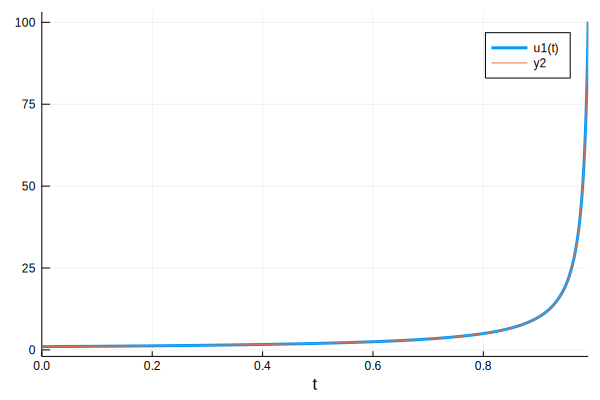

In [44]:
using DifferentialEquations, Plots

φ(t) = 1 / (1 - t)

f_t_time(x,p,t) = x^2
x0 = 1.
t0, tend, δ = 0.0, 0.99, 0.001
prob = ODEProblem(f_t_time, x0, (t0, tend))
@time sol_t = solve(prob)
plot(sol_t)
# plot against analytical solution
t_time = t0:δ:tend
plot!(t_time, φ.(t_time))

Try for yourself what happens as you let `tend` go to 1. 
Luckily, `DifferentialEquations` is smart enough to catch a lot for you, but still...
Let's use a time transformation now.

  1.531677 seconds (1.09 M allocations: 55.293 MiB, 4.44% gc time)


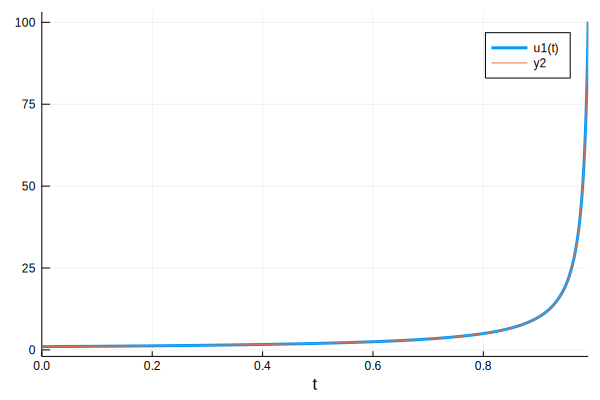

In [54]:
g(τ) = τ / (1 + τ)
g_prime(τ) = 1 / (1 + τ)^2
g_inv(t) = t / (1 - t)
f_τ_time(y,p,τ) = f(y,p,τ)*g_prime(τ)
τ0, τend, δ = 0., 100., 0.01
prob = ODEProblem(f_τ_time, x0, (τ0, τend))
@time sol_τ = solve(prob)
# plotting sol_τ is not really what we are interested in.
# we want instead the following
plot(sol_t)
plot!(t_time, sol_τ.(g_inv.(t_time)))
